In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

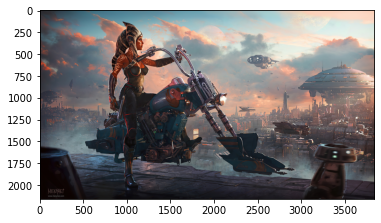

In [2]:
img_path = '/Users/pietrobianco/Desktop/ahsoka_bike.jpg'

img = Image.open(img_path)
plt.imshow(img)
plt.show()

In [3]:
from operator import add
from functools import reduce

def compute_mean_color(image):
            return np.mean(image, axis=(0,1)) 
    
def normalise(image):
    ''' Normalise image [0, 255] -> [0, 1]'''
    pix = np.array(image, dtype='float')
    pix *= 1.0/255.0
    return pix

class QuadTreeImg:
    '''
    A class to represent, subdivide and work on images as quadtree
    '''
    
    def __init__(self, img, max_depth = 25, epsilon=50, depth=0):
        
        self.img = img
        self.depth = depth
        self.max_depth = max_depth
        if self.depth==0: # normalise the img
            self.img = normalise(img)
    
        self.epsilon = epsilon
        self.quadtree = [None, None, None, None]
        self.divided = False
        self.q_pixel = None
    
    def should_split(self):
        '''
        Helper function that returns wheter or not the differenece between the image
        and its mean color is greater than some tolerance
        '''
        
        mean = compute_mean_color(self.img)
        error = [pix - mean for pix in self.img]
        return np.linalg.norm(error) > self.epsilon and self.depth < self.max_depth
        
    def split(self, force=False):
        '''Splits an image into four components. The force flag ignores the tolerance'''
        #if self.should_split() or force:
        # first split along one axis ...
        img_two_split = np.array_split(self.img, 2, axis=0)
        # ...then split again along the other axis to get 4 pieces
        res = np.array([np.array_split(x, 2, axis=1) for x in img_two_split])
        res = np.vstack(res)
        self.quadtree = [QuadTreeImg(quad, depth=self.depth+1) for quad in res]
        self.divided = True
    
    def show(self):
        plt.imshow(self.img)
        plt.show()
        
    def show_quadtree(self):
        '''Similar to show() but it separates each quadrant'''
        
        if not self.divided:
            print('There is no quadtree!')
            return
        
        plt.figure()
        fig, axs = plt.subplots(2, 2)
        axs = np.hstack(axs)
        for i in range(4):
            axs[i].imshow(self.quadtree[i].img)

    def compute_quad_pixel(self):
        '''Computes the color of the current quadrant (the mean color)'''
        self.q_pixel = compute_mean_color(self.img) 
    
    def show_quad(self):
        if self.q_pixel is None:
            self.compute_quad_pixel()
        plt.figure()
        plt.imshow([[self.q_pixel]])
        plt.show()
        

<Figure size 432x288 with 0 Axes>

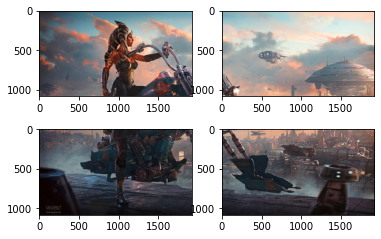

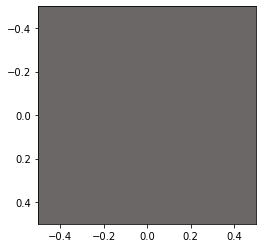

In [91]:
qt_img = QuadTreeImg(img)
qt_img.split()
qt_img.show_quadtree()
qt_img.show_quad()

In [13]:
def build_quadtree(image, epsilon):
    '''Builds a quadtree of a image given a tolerance epsilone'''
    root = QuadTreeImg(image, epsilon=epsilon, max_depth=5)
    quadrants = [root]
    n = 0
    while len(quadrants) != 0:
        quad = quadrants.pop(0)
        print(quad)
        if quad.should_split():
            print('Splitting quadtree')
            quad.split()
            quadrants += quad.quadtree
            print(quadrants)
        n += 1
#             quadrants.join(quad.quadtree)
    return root

In [14]:
root = build_quadtree(img, epsilon=20)

Splitting quadtree
[<__main__.QuadTreeImg object at 0x118259710>, <__main__.QuadTreeImg object at 0x11827fed0>, <__main__.QuadTreeImg object at 0x11827fad0>, <__main__.QuadTreeImg object at 0x11827f850>]
Splitting quadtree
[<__main__.QuadTreeImg object at 0x11827fed0>, <__main__.QuadTreeImg object at 0x11827fad0>, <__main__.QuadTreeImg object at 0x11827f850>, <__main__.QuadTreeImg object at 0x118277b10>, <__main__.QuadTreeImg object at 0x11827fd50>, <__main__.QuadTreeImg object at 0x11827ffd0>, <__main__.QuadTreeImg object at 0x11827fa10>]
Splitting quadtree
[<__main__.QuadTreeImg object at 0x11827fad0>, <__main__.QuadTreeImg object at 0x11827f850>, <__main__.QuadTreeImg object at 0x118277b10>, <__main__.QuadTreeImg object at 0x11827fd50>, <__main__.QuadTreeImg object at 0x11827ffd0>, <__main__.QuadTreeImg object at 0x11827fa10>, <__main__.QuadTreeImg object at 0x118289950>, <__main__.QuadTreeImg object at 0x118289990>, <__main__.QuadTreeImg object at 0x118289a10>, <__main__.QuadTreeIm

[<__main__.QuadTreeImg object at 0x118289ad0>, <__main__.QuadTreeImg object at 0x118289b90>, <__main__.QuadTreeImg object at 0x118289a50>, <__main__.QuadTreeImg object at 0x1182897d0>, <__main__.QuadTreeImg object at 0x118289790>, <__main__.QuadTreeImg object at 0x1182899d0>, <__main__.QuadTreeImg object at 0x118289910>, <__main__.QuadTreeImg object at 0x118289a90>, <__main__.QuadTreeImg object at 0x118289210>, <__main__.QuadTreeImg object at 0x118289850>, <__main__.QuadTreeImg object at 0x118289c90>, <__main__.QuadTreeImg object at 0x118289890>, <__main__.QuadTreeImg object at 0x118289bd0>, <__main__.QuadTreeImg object at 0x118289d50>, <__main__.QuadTreeImg object at 0x118289450>, <__main__.QuadTreeImg object at 0x118289810>, <__main__.QuadTreeImg object at 0x1182894d0>, <__main__.QuadTreeImg object at 0x118289510>, <__main__.QuadTreeImg object at 0x118289d90>, <__main__.QuadTreeImg object at 0x118289410>, <__main__.QuadTreeImg object at 0x118289dd0>, <__main__.QuadTreeImg object at 0

Splitting quadtree
[<__main__.QuadTreeImg object at 0x118289510>, <__main__.QuadTreeImg object at 0x118289d90>, <__main__.QuadTreeImg object at 0x118289410>, <__main__.QuadTreeImg object at 0x118289dd0>, <__main__.QuadTreeImg object at 0x118289cd0>, <__main__.QuadTreeImg object at 0x118289e50>, <__main__.QuadTreeImg object at 0x118289d10>, <__main__.QuadTreeImg object at 0x118289ed0>, <__main__.QuadTreeImg object at 0x118289e90>, <__main__.QuadTreeImg object at 0x118289fd0>, <__main__.QuadTreeImg object at 0x118289490>, <__main__.QuadTreeImg object at 0x118289b10>, <__main__.QuadTreeImg object at 0x118289f90>, <__main__.QuadTreeImg object at 0x118289f50>, <__main__.QuadTreeImg object at 0x118289c50>, <__main__.QuadTreeImg object at 0x118289c10>, <__main__.QuadTreeImg object at 0x118289b50>, <__main__.QuadTreeImg object at 0x118289e10>, <__main__.QuadTreeImg object at 0x118283190>, <__main__.QuadTreeImg object at 0x1182831d0>, <__main__.QuadTreeImg object at 0x118283290>, <__main__.Quad

Splitting quadtree
[<__main__.QuadTreeImg object at 0x118259490>, <__main__.QuadTreeImg object at 0x1182597d0>, <__main__.QuadTreeImg object at 0x118252b10>, <__main__.QuadTreeImg object at 0x11837edd0>, <__main__.QuadTreeImg object at 0x118252ed0>, <__main__.QuadTreeImg object at 0x118252e90>, <__main__.QuadTreeImg object at 0x118252f10>, <__main__.QuadTreeImg object at 0x118252d90>, <__main__.QuadTreeImg object at 0x118252b50>, <__main__.QuadTreeImg object at 0x118388110>, <__main__.QuadTreeImg object at 0x1182590d0>, <__main__.QuadTreeImg object at 0x10edf2d10>, <__main__.QuadTreeImg object at 0x118252d10>, <__main__.QuadTreeImg object at 0x1182830d0>, <__main__.QuadTreeImg object at 0x118283210>, <__main__.QuadTreeImg object at 0x118283390>, <__main__.QuadTreeImg object at 0x118283090>, <__main__.QuadTreeImg object at 0x1182833d0>, <__main__.QuadTreeImg object at 0x118283250>, <__main__.QuadTreeImg object at 0x118283490>, <__main__.QuadTreeImg object at 0x118283350>, <__main__.Quad

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:47: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Splitting quadtree
[<__main__.QuadTreeImg object at 0x118404890>, <__main__.QuadTreeImg object at 0x118404a10>, <__main__.QuadTreeImg object at 0x118404990>, <__main__.QuadTreeImg object at 0x118404ad0>, <__main__.QuadTreeImg object at 0x118404850>, <__main__.QuadTreeImg object at 0x118404b10>, <__main__.QuadTreeImg object at 0x118404a90>, <__main__.QuadTreeImg object at 0x118404bd0>, <__main__.QuadTreeImg object at 0x118404190>, <__main__.QuadTreeImg object at 0x118404c10>, <__main__.QuadTreeImg object at 0x118404b90>, <__main__.QuadTreeImg object at 0x118404cd0>, <__main__.QuadTreeImg object at 0x118404a50>, <__main__.QuadTreeImg object at 0x118404d10>, <__main__.QuadTreeImg object at 0x118404c90>, <__main__.QuadTreeImg object at 0x118404dd0>, <__main__.QuadTreeImg object at 0x118404b50>, <__main__.QuadTreeImg object at 0x118404e10>, <__main__.QuadTreeImg object at 0x118404d90>, <__main__.QuadTreeImg object at 0x118404ed0>, <__main__.QuadTreeImg object at 0x118404c50>, <__main__.Quad

AxisError: axis 1 is out of bounds for array of dimension 1

In [10]:
quad = root.quadtree[0].quadtree[3]
print(quad)
quad.show()

NameError: name 'root' is not defined